In [5]:
from CustomObjects import *
from sklearn.model_selection import train_test_split

%matplotlib inline

In [6]:
! mkdir -p ../data/training
! mkdir -p ../data/validation
! mkdir -p ../data/test
! mkdir -p ../figures/split

### Split data in training and test sets (90/10) -> Further split training set in training and validation sets(80/20)

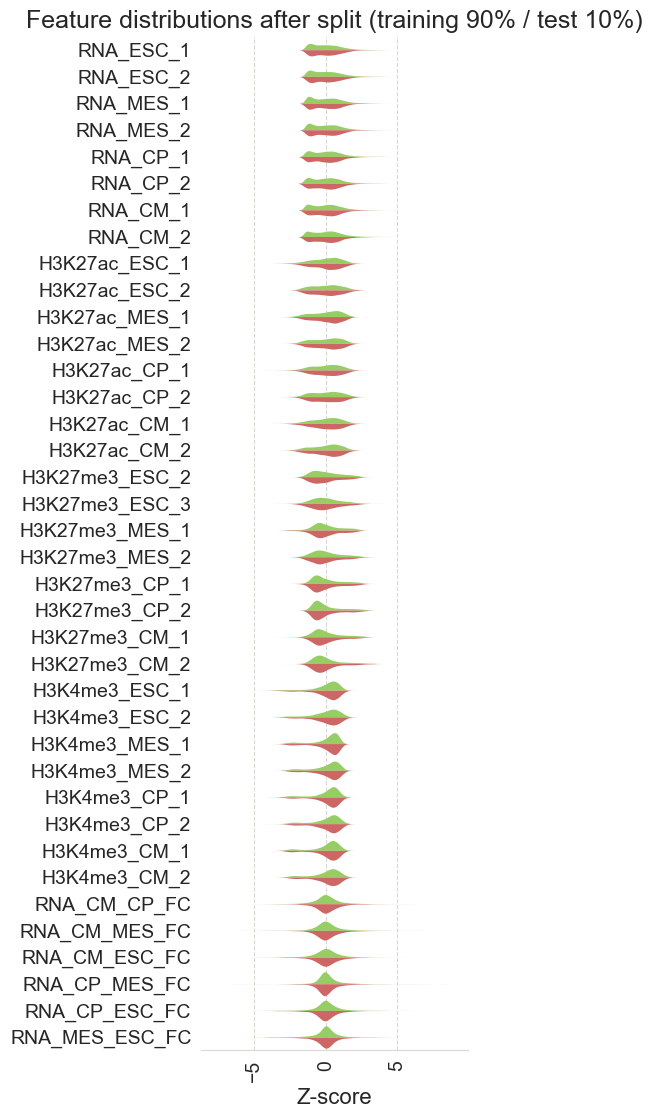

In [7]:

INPUT_GENES    = 'ALL'
INPUT_FEATURES = 'X_FC'
INPUT_NORM     = '_z'

INPUT_NAME     = f'{INPUT_GENES}_{INPUT_FEATURES}{INPUT_NORM}'
INPUT_MATRIX   =f'../data/matrices/{INPUT_GENES}/{INPUT_NAME}.csv'
X = pd.read_csv( INPUT_MATRIX ).set_index('GENE')            
assert X.isna().any().sum() == 0

X_train, X_test = train_test_split(X, test_size = 0.10, shuffle=True, 
                                    #stratify=RNA_bins, 
                                    random_state = 42)
X_train, X_val = train_test_split(X_train, test_size = 0.20, shuffle=True, 
                                    #stratify=RNA_bins, 
                                    random_state = 42)

X_train.to_csv(f'../data/training/{INPUT_NAME}_training.csv', index_label='GENE')
X_val.to_csv(f'../data/validation/{INPUT_NAME}_validation.csv', index_label='GENE')
X_test.to_csv(f'../data/test/{INPUT_NAME}_test.csv',         index_label='GENE')
violins_train_test(X_train, X_test, SET_COL_DICT, INPUT_NAME ,MODE='test', TITLE = 'Feature distributions after split (training 90% / test 10%)')
violins_train_test(X_train, X_val, SET_COL_DICT, INPUT_NAME, MODE='validation', TITLE = 'Feature distributions after split (training 80% / val 20%)')
